<a href="https://colab.research.google.com/github/adrianpychan/personalprojects/blob/main/Ramen_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("ramen-ratings.csv").drop(["Top Ten","Review #"], axis = 1)
df

,Brand,Variety,Style,Country,Stars
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,Ching's Secret,Singapore Curry,Pack,India,3.75
...,...,...,...,...,...
2575,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
2576,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1
2577,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2
2578,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2


In [ ]:
df["Stars"] = pd.to_numeric(df['Stars'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brand    2580 non-null   object 
 1   Variety  2580 non-null   object 
 2   Style    2578 non-null   object 
 3   Country  2580 non-null   object 
 4   Stars    2577 non-null   float64
dtypes: float64(1), object(4)
memory usage: 100.9+ KB


In [ ]:
df.nunique()

Brand       355
Variety    2413
Style         7
Country      38
Stars        42
dtype: int64

In [ ]:
df = df.drop_duplicates(subset = ["Variety"])
df

,Brand,Variety,Style,Country,Stars
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,Ching's Secret,Singapore Curry,Pack,India,3.75
...,...,...,...,...,...
2572,Tung-I,Chinese Beef Instant Rice Noodle,Pack,Taiwan,3.00
2573,Ve Wong,Mushroom Pork,Pack,Vietnam,1.00
2575,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50
2576,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00


# **1.What country produces the highest amount of ramen products?**

In [ ]:
df.Country.value_counts()

Japan            328
USA              308
South Korea      282
Taiwan           217
Thailand         162
China            154
Malaysia         150
Hong Kong        133
Indonesia        120
Vietnam          104
Singapore         98
UK                64
Philippines       46
Canada            37
India             29
Germany           26
Mexico            25
Australia         21
Nepal             14
Myanmar           14
Netherlands       13
Pakistan           9
Hungary            8
Bangladesh         7
Colombia           6
Brazil             5
Holland            4
Cambodia           4
Fiji               4
Poland             4
Sweden             3
Finland            3
Sarawak            3
Dubai              2
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

# **2. Whats the country with the highest rating products?**

In [ ]:
#Ratings between 4.1 and 5.0:
df[(df["Stars"]>4) & (df["Stars"]<=5)]["Country"].value_counts().head(5)

Japan          146
South Korea     85
Taiwan          76
Malaysia        72
USA             67
Name: Country, dtype: int64

In [ ]:
#Ratings between 3.1 and 4.0:
df[(df["Stars"]>3) & (df["Stars"]<=4)]["Country"].value_counts().head(5)

USA            154
South Korea    152
Japan          133
Thailand        96
Taiwan          95
Name: Country, dtype: int64

In [ ]:
#Ratings between 2.1 and 3.0:
df[(df["Stars"]>2) & (df["Stars"]<=3)]["Country"].value_counts().head(5)

USA            50
Japan          33
South Korea    28
Vietnam        26
Thailand       24
Name: Country, dtype: int64

In [ ]:
#Ratings between 1.1 and 2.0:
df[(df["Stars"]>1) & (df["Stars"]<=2)]["Country"].value_counts().head(5)

USA         26
Thailand    13
Taiwan      13
UK          11
China       11
Name: Country, dtype: int64

In [ ]:
#Ratings between 0 and 1.0:
df[(df["Stars"]>=0) & (df["Stars"]<=1)]["Country"].value_counts().head(5)

China     12
USA       11
Taiwan    10
Canada     8
Japan      7
Name: Country, dtype: int64

In [ ]:
#3.Does the style of the product affects the score directly, does a certain kind of product style means a lower score?
df[df["Stars"]==5]["Style"].value_counts()

Pack    226
Bowl     69
Cup      55
Tray     12
Box       4
Bar       1
Name: Style, dtype: int64

# **3. Whats Brands have the highest rating products?** 

Ratings between 4.1 and 5.0:


In [ ]:
df[(df["Stars"]>4) & (df["Style"]=="Cup")]["Brand"].value_counts().head(10)

Nissin               38
Nongshim              9
Mama                  5
KOKA                  5
MyKuali               3
Eat & Go              3
Indomie               3
Mamee                 3
Mr. Lee's Noodles     2
Golden Wonder         1
Name: Brand, dtype: int64

Ratings between 3.1 and 4.0:

In [ ]:
df[(df["Stars"]>3) & (df["Stars"]<=4)]["Brand"].value_counts().head(7)

Nissin           198
Nongshim          41
Maruchan          40
Mama              38
Paldo             35
Samyang Foods     29
Myojo             28
Name: Brand, dtype: int64

In [ ]:
#Ratings between 2.1 and 3.0:
df[(df["Stars"]>2) & (df["Stars"]<=3)]["Brand"].value_counts().head(5)

Nissin          45
Maruchan        14
Vina Acecook     8
Lucky Me!        8
Nongshim         8
Name: Brand, dtype: int64

In [ ]:
#Ratings between 1.1 and 2.0:
df[(df["Stars"]>1) & (df["Stars"]<=2)]["Brand"].value_counts().head(5)

Nissin         9
Mr. Noodles    7
Vifon          6
Maruchan       6
Mama           5
Name: Brand, dtype: int64

In [ ]:
#Ratings between 0 and 1.0:
df[(df["Stars"]>=0) & (df["Stars"]<=1)]["Brand"].value_counts().head(5)

Baijia       6
Roland       2
Wai Wai      2
Lucky Me!    2
Azami        2
Name: Brand, dtype: int64

# **4. What are the average Stars for Countries, Style and Brands?**

In [ ]:
#Average Stars by Country:
df.groupby('Country')['Stars'].mean().sort_index(ascending=False).sort_values(ascending=False)

Country
Cambodia         4.375000
Brazil           4.350000
Sarawak          4.333333
Singapore        4.165816
Malaysia         4.125168
Indonesia        4.083333
Japan            3.965777
Myanmar          3.946429
Fiji             3.875000
Hong Kong        3.792105
South Korea      3.782321
United States    3.750000
Mexico           3.730000
Bangladesh       3.714286
Taiwan           3.684562
Germany          3.634615
Poland           3.625000
Hungary          3.625000
Finland          3.583333
Holland          3.562500
Nepal            3.553571
Dubai            3.500000
Estonia          3.500000
Ghana            3.500000
Thailand         3.467593
USA              3.456575
India            3.370690
Philippines      3.369565
China            3.368831
Colombia         3.291667
Sweden           3.250000
Vietnam          3.182692
Australia        3.169048
UK               3.012500
Pakistan         3.000000
Netherlands      2.346154
Canada           2.236486
Nigeria          1.500000
Name

In [ ]:
#Average Stars by Style:
df.groupby('Style')['Stars'].mean().sort_index(ascending=False).sort_values(ascending=False)

Style
Bar     5.000000
Box     4.291667
Pack    3.710717
Bowl    3.666704
Tray    3.525000
Can     3.500000
Cup     3.494267
Name: Stars, dtype: float64

In [ ]:
#Average Stars by Brands:
df.groupby('Brand')['Stars'].mean().sort_index(ascending=False).sort_values(ascending=False)

Brand
Higashi           5.0
Plats Du Chef     5.0
Song Hak          5.0
ORee Garden       5.0
Takamori          5.0
                 ... 
One Dish Asia     0.0
Tiger             0.0
Roland            0.0
US Canning        0.0
Hsin Tung Yang    0.0
Name: Stars, Length: 345, dtype: float64

# **5. Are there a significant difference between brand average scores?**

In [ ]:
# 4.Is there a significant difference between brand average scores?

stars = pd.DataFrame(df.groupby('Brand')['Stars'].mean())
stars["Brands"] = stars.index
stars = stars.reset_index(drop=True)
stars = stars[['Brands','Stars']]
stars

,Brands,Stars
0,1 To 3 Noodles,4.000000
1,7 Select,3.750000
2,A-One,2.750000
3,A-Sha Dry Noodle,4.067308
4,A1,3.083333
...,...,...
340,Yum Yum,3.861111
341,Yum-Mie,3.500000
342,Zow Zow,3.750000
343,iMee,3.625000


In [ ]:
style = pd.DataFrame(df.groupby('Style')['Stars'].mean())
style["Style"] = style.index
style = style.reset_index(drop=True)
style = style[['Style','Stars']]
style

,Style,Stars
0,Bar,5.000000
1,Bowl,3.666704
2,Box,4.291667
3,Can,3.500000
4,Cup,3.494267
5,Pack,3.710717
6,Tray,3.525000


In [ ]:
country = pd.DataFrame(df.groupby('Country')['Stars'].mean())
country["Country"] = country.index
country = country.reset_index(drop=True)
country = country[['Country','Stars']]
country.rename(columns={'Stars':'Average Stars'}, inplace=True)
country.head(15)

,Country,Average Stars
0,Australia,3.169048
1,Bangladesh,3.714286
2,Brazil,4.350000
3,Cambodia,4.375000
4,Canada,2.236486
5,China,3.368831
6,Colombia,3.291667
7,Dubai,3.500000
8,Estonia,3.500000
9,Fiji,3.875000


# **6. Popular Flavours?**

In [ ]:
no_stop_words.str.split(expand=True).stack().value_counts().head(10)

Chicken    317
Spicy      257
Beef       228
Soup       181
TomYum     171
Rice       130
Curry      125
Mi         116
Hot        109
Seafood    100
dtype: int64

# Identifying Stop Words:

In [ ]:
from collections import Counter
import nltk
nltk.download("stopwords")
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append("Noodles")
stopwords.append("Noodle")
stopwords.append("Instant")
stopwords.append("Cup")
stopwords.append("&")
stopwords.append("With")
stopwords.append("Flavour")
stopwords.append("Flavor")
stopwords.append("Bowl")
stopwords.append("Ramen")
stopwords.append("Artificial")
stopwords.append("Sauce")
stopwords.append("Oriental")
stopwords.append("RamYun")
stopwords.append("Ramyun")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Turning Two Words into One (e.g. "Tom Yum")

In [ ]:
#Correcting Two Words:

df.loc[df["Variety"].str.contains('tom yum', case=False, na = False), "Variety"] = "TomYum"
df.loc[df["Variety"].str.contains('tom', case=False, na = False), "Variety"] = "TomYum"
df.loc[df["Variety"].str.contains('yum', case=False, na = False), "Variety"] = "TomYum"

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


# Getting rid of Stop Words:

In [ ]:
no_stop_words = df['Variety'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))

In [ ]:
no_stop_words.str.split(expand=True).stack().value_counts()

Chicken         290
Spicy           245
Beef            198
Soup            179
TomYum          158
               ... 
AizuKitakata      1
Orange            1
Ossyoi            1
Sopas             1
Arrabiata         1
Length: 1496, dtype: int64

# DataFrame

In [ ]:
words = pd.DataFrame(no_stop_words.str.split(expand=True).stack().value_counts().reset_index(drop = True))
words["Word"] = no_stop_words.str.split(expand=True).stack().value_counts().index
words.rename(columns={0:'Frequency'}, inplace=True)
words = words[['Word','Frequency']]
words.head(20)

,Word,Frequency
0,Chicken,290
1,Spicy,245
2,Beef,198
3,Soup,179
4,TomYum,158
5,Rice,126
6,Curry,114
7,Mi,111
8,Hot,104
9,Seafood,98


# WordCloud

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
flavour = pd.DataFrame(no_stop_words.str.split(expand=True).stack())
flavour.rename(columns={0:'Frequency'}, inplace=True)

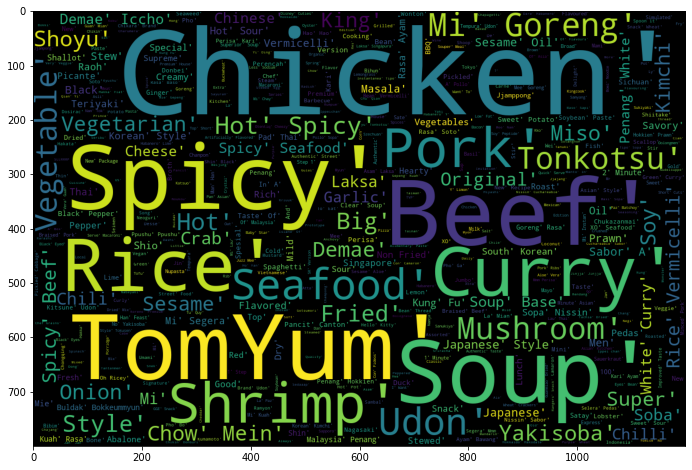

In [ ]:
#Flavour Wordcloud:
flavor = flavour["Frequency"].tolist()
wordcloud = WordCloud(width=1200, height=800, max_words = 500).generate(str(flavor))

# Display the generated image:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)